In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time
import bisect
sys.path.append('D:/Dropbox/py_projects/customlib/')
import customlib as cl

import numpy as np
import scipy.constants as pc
import pandas as pd

import matplotlib.pyplot as plt

# UV transport
---

The UV transport has to go from the fourth harmonic generation module (FHG) to the photo cathode. Currently, we are considering a 13 m transport distance from iris to cathode. The iris will be imaged on the cathode without creating a focus on the cathode in order to reduce the risk of "burning" the cathode by delivering a large energy density into a tight focus.

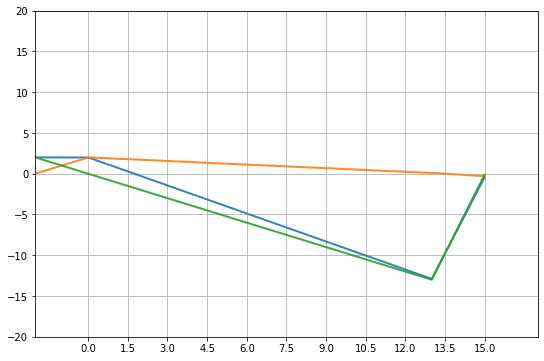

In [2]:
# DIST_EXP1 = 0.045
DIST_EXP1 = 1e-6
DIST_TRANSPORT = 13
DIST_EXP2 = 1e-6
DIST_1 = 1e-6

Le1POS = 0.0
Le2POS = Le1POS + DIST_EXP1
Le3POS = Le1POS + DIST_EXP1 + DIST_TRANSPORT
Le4POS = Le1POS + DIST_EXP1 + DIST_TRANSPORT + DIST_EXP2
Le5POS = Le1POS + DIST_EXP1 + DIST_TRANSPORT + DIST_EXP2 + DIST_1

flenpos = 0.750
flenneg = -1.5
FLENe1 = 1.74524
FLENe2 = 1e6
FLENe3 = 1.74524
FLENe4 = 1e6
FLENe5 = 1e6

elementlist = [cl.BLElement('lens_01', eleprops={'eletype':'lens', 'position' : Le1POS, 'focal_len' : FLENe1})
              ,cl.BLElement('lens_02', eleprops={'eletype':'lens', 'position' : Le2POS, 'focal_len' : FLENe2})
              ,cl.BLElement('lens_03', eleprops={'eletype':'lens', 'position' : Le3POS, 'focal_len' : FLENe3})
              ,cl.BLElement('lens_04', eleprops={'eletype':'lens', 'position' : Le4POS, 'focal_len' : FLENe4})
              ,cl.BLElement('lens_05', eleprops={'eletype':'lens', 'position' : Le5POS, 'focal_len' : FLENe5})
              ]



BLUV = cl.BeamLine()
for i,ele in enumerate(elementlist):
    BLUV.add_element(ele)

### principal rays
inpos01 = -2
R0 = 2e-3
A0 = np.abs(R0/inpos01)
# invec01 = np.array([[R0,-R0, 0, 0, R0],[0,0,A0,-A0,-A0]])
invec01 = np.array([[R0, 0, R0],[0,A0,-A0]])

outpos01 = np.arange(0.0,15,0.005)
outpos01, outvec01, _,_ = BLUV.ray_trace(invec01, inpos01, outpos01)

fig, ax = plt.subplots(figsize=(9,6))

ls = dict(linewidth=2,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.91)
colorlist = ['dodgerblue','dodgerblue','orange','orange', 'tab:green', 'tab:green']
xvec = outpos01

yscale = 1e3
for i in range(invec01.shape[1]):
    # ls['color'] = colorlist[i]
    yvec = yscale * outvec01[:,0,i]
    plt.plot(xvec, yvec,**ls)

pr = [-2,17, -20.0,20.0]
# pr = [11,15, -20.0,20.0]
plt.axis(pr)
plt.xticks(np.arange(0,16, 1.5))
# plt.yticks(np.arange(0,2.1,2))
plt.grid(True)
plt.show()


In [62]:
Le4POS
Le5POS + 0.5

13.002999999999998

In [60]:

BLUV.make_mat(inpos01, Le5POS + 0.5)

array([[-4.68107823,  0.03254824],
       [ 2.9767825 , -0.23432401]])

In [3]:
# make beam
UV_POS_MEAN = 0.0
UV_POS_RMS = 0.75e-3
UV_ANG_MEAN = 10.0e-6
UV_ANG_RMS = 10e-6
NMACRO = 5000
invec_uvtrans = np.stack((np.random.normal(UV_POS_MEAN, UV_POS_RMS, NMACRO),
                        np.random.normal(UV_ANG_MEAN, UV_ANG_RMS, NMACRO)))
INPOS = -2
OUTPOS = np.array([4.5])

outpos_uvtrans = np.arange(0.0,20.0,0.05)
outpos_uvtrans, outvec_uvtrans, outvec_uvtrans_MEAN, outvec_uvtrans_RMS = BLUV.ray_trace(invec_uvtrans, INPOS, outpos_uvtrans)


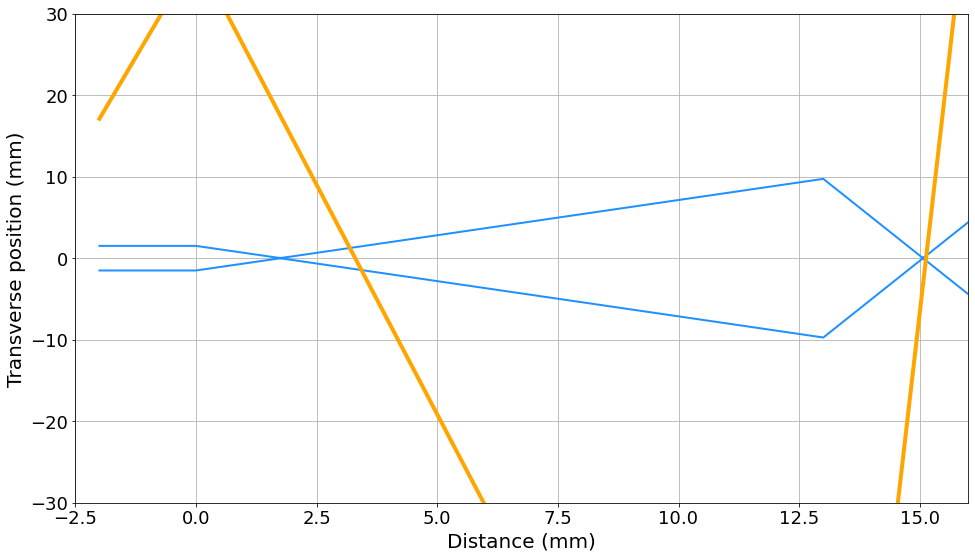

In [4]:
fig, ax = plt.subplots(figsize=(16,9))

ls = dict(linewidth=4,linestyle='-',color='dodgerblue',marker='o',ms=0, mfc='None', alpha=0.01)

xvec = outpos_uvtrans
yscale = 1e3
# for i in range(invec_uvtrans.shape[1]):
#     yvec = yscale * outvec_uvtrans[:,0,i]
        
#     ax.plot(xvec, yvec,**ls)

ls = dict(linewidth=2,linestyle='-',color='dodgerblue',marker='o',ms=0, mfc='None', alpha=1)
yvec = 2*yscale * outvec_uvtrans_RMS[:,0]
ax.plot(xvec, yvec, **ls)
yvec = -2*yscale * outvec_uvtrans_RMS[:,0]
ax.plot(xvec, yvec, **ls)

ls = dict(linewidth=4,linestyle='-',color='orange',marker='o',ms=0, mfc='None', alpha=1)
yvec = 1e6 * outvec_uvtrans_MEAN[:,0]
ax.plot(xvec, yvec, **ls)

# pr = [0,13.7, -1.0,1.0]
pr = [-2.5,16, -30,30]
plt.axis(pr)

fs = dict(color='k', fontsize=20)

ax.set_xlabel('Distance (mm)', **fs)
ax.set_ylabel('Transverse position (mm)',**fs)

# plt.xticks(np.arange(0.0, 16, 1))
# plt.yticks(np.arange(-2.5,2.5,0.25))
ax.tick_params(labelcolor='k', labelsize=18 )

ax.grid(True)
plt.show()

In [32]:
figpath = r'D:/Dropbox/RBT/4grit/laser/reports/figures/uv-transport/'
figname = r'line_UV-transport_focus-5m_20210720.png'
fig.savefig(figpath+figname, dpi=100, format='png')

## scan lens 2 position 
---

In [127]:
OUTPOS = np.array([5])

BLUV.del_element('lens_02')
lens2position = np.arange(0.005,0.1,0.005)
stdposfinal = np.zeros(lens2position.shape)

for i,l2pos in enumerate(lens2position):

    lens2 = cl.BLElement('lens_02', eleprops={'eletype':'lens','position':l2pos,'focal_len':FLEN2})
    BLUV.add_element(lens2)

    outpostemp, outvectemp = BLUV.ray_trace(invec01, INPOS, OUTPOS)
    stdposfinal[i] = outvectemp[-1,0,:].std()

    BLUV.del_element('lens_02')

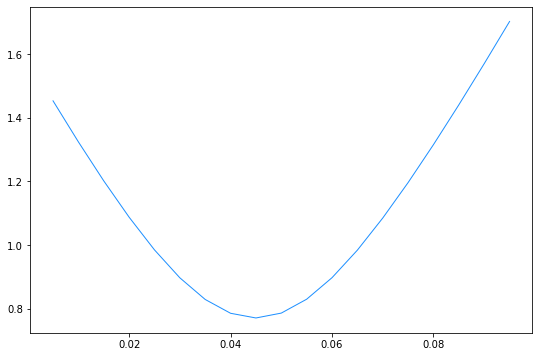

In [128]:
ls = dict(linewidth=1,linestyle='-',marker='o',ms=0, mfc='None', alpha=1)
ls['color'] = 'dodgerblue'

fig, ax = plt.subplots(figsize=(9,6))

xvec = lens2position
yvec = 1e3 * stdposfinal
plt.plot(xvec, yvec,**ls)
# plt.axis([lens2position.min(), lens2position.max(), 0, 500])


# UV photocathode
---

In [31]:

DIST_EXP_CIRIS = 0.5
DIST_L2CATH = 800e-3 # don't change this. this is set from window into mirror box

def aux_make_uvin_bl( DIST_CIRIS_L1 = 0.5 , DIST_Lp1p2 = 10e-3, DIST_Lp21 = 255e-3, DIST_L12 = 1083e-3 ):
   

    Lp1POS = Le5POS + DIST_EXP_CIRIS + DIST_CIRIS_L1
    Lp2POS = Lp1POS + DIST_Lp1p2
    L1POS = Lp1POS + DIST_Lp1p2 + DIST_Lp21
    L2POS = Lp1POS + DIST_Lp1p2 + DIST_Lp21 + DIST_L12
    CATHPOS = Lp1POS + DIST_Lp1p2 + DIST_Lp21 + DIST_L12 + DIST_L2CATH

    FLENp1 = 1000e-3
    FLENp2 = 1000e-3
    FLEN1 = -150e-3
    FLEN2 = 500e-3

    elementlist = [cl.BLElement('lens_exp1_01', eleprops={'eletype':'lens', 'position' : Le1POS, 'focal_len' : FLENe1})
                ,cl.BLElement('lens_exp1_02', eleprops={'eletype':'lens', 'position' : Le2POS, 'focal_len' : FLENe2})
                ,cl.BLElement('lens_exp2_01', eleprops={'eletype':'lens', 'position' : Le3POS, 'focal_len' : FLENe3})
                ,cl.BLElement('lens_exp2_02', eleprops={'eletype':'lens', 'position' : Le4POS, 'focal_len' : FLENe4})
                ,cl.BLElement('lens_exp2_03', eleprops={'eletype':'lens', 'position' : Le5POS, 'focal_len' : FLENe5})
                ,cl.BLElement('lens_uvin_01', eleprops={'eletype':'lens', 'position' : Lp1POS, 'focal_len' : FLENp1})
                ,cl.BLElement('lens_uvin_02', eleprops={'eletype':'lens', 'position' : Lp2POS, 'focal_len' : FLENp2})
                ,cl.BLElement('lens_uvin_03', eleprops={'eletype':'lens', 'position' : L1POS, 'focal_len' : FLEN1})
                ,cl.BLElement('lens_uvin_04', eleprops={'eletype':'lens', 'position' : L2POS, 'focal_len' : FLEN2})
                ]

    BLUVcathode = cl.BeamLine()
    for ele in elementlist:
        BLUVcathode.add_element(ele)

    return BLUVcathode



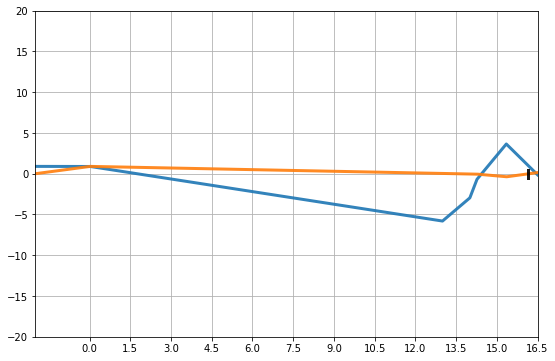

In [32]:
# set values
DIST_CIRIS_L1 = 500e-3
DIST_Lp1p2 = 10e-3
DIST_Lp21 = 255e-3
DIST_L12 = 1083e-3

# make beamline
BLUVcathode = aux_make_uvin_bl( DIST_CIRIS_L1, DIST_Lp1p2, DIST_Lp21, DIST_L12 )
CATHPOS = BLUVcathode.element_list[ BLUVcathode.element_names.index('lens_uvin_04') ].properties['position'] + DIST_L2CATH

# principal rays
inpos01 = -2
R0 = 0.9e-3
A0 = np.abs(R0/inpos01)
invec01 = np.array([[R0, 0],[0,A0]])

# outpos01 = np.arange(0.0,3,0.001)
outpos01 = np.arange(0.0,17,0.005)
outpos01, outvec01,_,_ = BLUVcathode.ray_trace(invec01, inpos01, outpos01)

fig, ax = plt.subplots(figsize=(9,6))

ls = dict(linewidth=3,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.91)
colorlist = ['dodgerblue','dodgerblue','orange','orange']
xvec = outpos01

yscale = 1e3
for i in range(invec01.shape[1]):
    # ls['color'] = colorlist[i]
    yvec = yscale * outvec01[:,0,i]
    ax.plot(xvec, yvec,**ls)

xvec = [CATHPOS, CATHPOS]
yvec = [-0.5,0.5]
ls['color'] = 'k'
ax.plot(xvec,yvec,**ls)

# pr = [-3.0,17, -10.0,10.0]
pr = [-2,16, -20.0,20.0]
# pr = [14.5,15.6, -2.0,2.0]
plt.axis(pr)
plt.xticks(np.arange(0.0, 18, 1.5))
# plt.yticks(np.arange(-2.5,2.5,0.25))
plt.grid(True)
plt.show()


In [33]:
figpath = r'D:/Dropbox/RBT/4grit/laser/reports/figures/uv-transport/'
figname = r'line_mainrays_UV-photocathode_rough_20210812.png'
fig.savefig(figpath+figname, dpi=100, format='png')

In [7]:
print(BLUV.element_names)
for el in BLUV.element_list:
    print(el.properties)
print(BLUVcathode.element_names)
for el in BLUVcathode.element_list:
    print(el.properties)

['lens_01', 'lens_02', 'lens_03', 'lens_04', 'lens_05']
{'eletype': 'lens', 'position': 0.0, 'focal_len': 1.74524}
{'eletype': 'lens', 'position': 1e-06, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 13.000001, 'focal_len': 1.74524}
{'eletype': 'lens', 'position': 13.000001999999999, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 13.000002999999998, 'focal_len': 1000000.0}
['lens_exp1_01', 'lens_exp1_02', 'lens_exp2_01', 'lens_exp2_02', 'lens_exp2_03', 'lens_uvin_01', 'lens_uvin_02', 'lens_uvin_03', 'lens_uvin_04']
{'eletype': 'lens', 'position': 0.0, 'focal_len': 1.74524}
{'eletype': 'lens', 'position': 1e-06, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 13.000001, 'focal_len': 1.74524}
{'eletype': 'lens', 'position': 13.000001999999999, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 13.000002999999998, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 14.000002999999998, 'focal_len': 1.0}
{'eletype': 'lens', 'position': 14.010002999999998,

In [33]:

BLUVcathode.element_list[ BLUVcathode.element_names.index('lens_uvin_04') ].properties

{'eletype': 'lens', 'position': 15.348002999999999, 'focal_len': 0.5}

In [35]:
# make beam
UV_POS_MEAN = 0.0e-6
UV_POS_RMS = 450.0e-6
UV_ANG_MEAN = 10.0e-6
UV_ANG_RMS = 10e-6
NMACRO = 1000

invec_uvcathode = np.stack((np.random.normal(UV_POS_MEAN, UV_POS_RMS, NMACRO),
                    np.random.normal(UV_ANG_MEAN, UV_ANG_RMS, NMACRO)))
INPOS = -2
# OUTPOS = np.array([3.0])

outpos_uvcathode = np.arange(0.0,16.50,0.05)
outpos_uvcathode, outvec_uvcathode, outvec_uvcathode_MEAN, outvec_uvcathode_RMS = BLUVcathode.ray_trace(invec_uvcathode, INPOS, outpos_uvcathode)

outvecstd = np.array( [ outvec_uvcathode[i,0,:].std() for i in range(outvec_uvcathode.shape[0]) ] )
outvecmax = np.array( [ outvec_uvcathode[i,0,:].max() for i in range(outvec_uvcathode.shape[0]) ] )

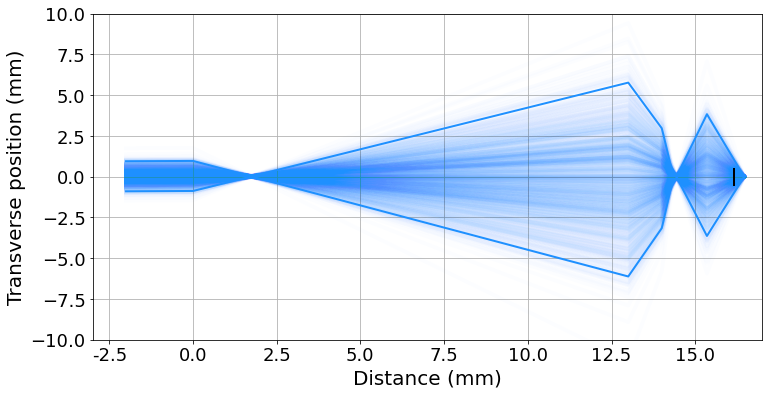

In [40]:
fig, ax = plt.subplots(figsize=(12,6))

ls = dict(linewidth=4,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.01)
ls['color'] = 'dodgerblue'
xscale = 1
xvec = xscale*outpos_uvcathode

yscale = 1e3
for i in range(invec_uvcathode.shape[1]):
    yvec = yscale * outvec_uvcathode[:,0,i]
        
    ax.plot(xvec, yvec,**ls)

ls = dict(linewidth=2,linestyle='-',color='dodgerblue',marker='o',ms=0, mfc='None', alpha=1)
ax.plot(xvec, yscale*(outvec_uvcathode_MEAN[:,0] + 2*outvec_uvcathode_RMS[:,0]), **ls)
ax.plot(xvec, yscale*(outvec_uvcathode_MEAN[:,0] - 2*outvec_uvcathode_RMS[:,0]), **ls)

ls = dict(linewidth=2,linestyle='-',color='orange',marker='o',ms=0, mfc='None', alpha=1)
yvec = 1e6 * outvec_uvcathode_MEAN[:,0]
# ax.plot(xvec, yvec, **ls)

xvec = xscale*np.array([CATHPOS, CATHPOS])
yvec = np.array([-0.5,0.5])
ls['color'] = 'k'
ax.plot(xvec,yvec,**ls)

pr = [-3.0,17, -10.0,10.0]
# pr = [-2.20,16.60, -25.0,25.0]
# pr = [11.95,17.05, -50,50]
# pr = [16.2,16.4,-1,1]
plt.axis(pr)
# plt.xticks(np.arange(0.0, 16, 1))
# plt.yticks(np.arange(-2.5,2.5,0.25))
fs = dict(color='k', fontsize=20)

ax.set_xlabel('Distance (mm)', **fs)
ax.set_ylabel('Transverse position (mm)',**fs)


leglist = ['hour-glass', 'constant profile']
# ax.legend(leglist, fontsize=20,loc='upper right')
ax.tick_params(labelcolor='k', labelsize=18 )
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax.grid(True)
plt.show()

In [41]:
figpath = r'D:/Dropbox/RBT/4grit/laser/reports/figures/uv-transport/'
figname = r'line_beam_UV-photocathode_rough_20210812.png'
fig.savefig(figpath+figname, dpi=100, format='png')

# PSO
---


In [10]:
def aux_uvin( DIST_CIRIS_L1 = 0.5 , DIST_Lp1p2 = 10e-3, DIST_Lp21 = 255e-3, DIST_L12 = 1083e-3 ):
   
    DIST_EXP_CIRIS = 0.5
    DIST_L2CATH = 800e-3 # don't change this. this is set from window into mirror box

    Lp1POS = Le5POS + DIST_EXP_CIRIS + DIST_CIRIS_L1
    Lp2POS = Lp1POS + DIST_Lp1p2
    L1POS = Lp1POS + DIST_Lp1p2 + DIST_Lp21
    L2POS = Lp1POS + DIST_Lp1p2 + DIST_Lp21 + DIST_L12
    CATHPOS = Lp1POS + DIST_Lp1p2 + DIST_Lp21 + DIST_L12 + DIST_L2CATH

    FLENp1 = 1000e-3
    FLENp2 = 1000e-3
    FLEN1 = -150e-3
    FLEN2 = 500e-3

    elementlist = [cl.BLElement('lens_01', eleprops={'eletype':'lens', 'position' : Le1POS, 'focal_len' : FLENe1})
                ,cl.BLElement('lens_02', eleprops={'eletype':'lens', 'position' : Le2POS, 'focal_len' : FLENe2})
                ,cl.BLElement('lens_03', eleprops={'eletype':'lens', 'position' : Le3POS, 'focal_len' : FLENe3})
                ,cl.BLElement('lens_04', eleprops={'eletype':'lens', 'position' : Le4POS, 'focal_len' : FLENe4})
                ,cl.BLElement('lens_05', eleprops={'eletype':'lens', 'position' : Le5POS, 'focal_len' : FLENe5})
                ,cl.BLElement('lens_p1', eleprops={'eletype':'lens', 'position' : Lp1POS, 'focal_len' : FLENp1})
                ,cl.BLElement('lens_p2', eleprops={'eletype':'lens', 'position' : Lp2POS, 'focal_len' : FLENp2})
                ,cl.BLElement('lens_01', eleprops={'eletype':'lens', 'position' : L1POS, 'focal_len' : FLEN1})
                ,cl.BLElement('lens_02', eleprops={'eletype':'lens', 'position' : L2POS, 'focal_len' : FLEN2})
                ]

    BLUVcathode = cl.BeamLine()
    for i,ele in enumerate(elementlist):
        BLUVcathode.add_element(ele)



    ### principal rays

    inpos_pso = -2
    R0 = 0.9e-3
    A0 = np.abs(R0/inpos01)
    invec_pso = np.array([[0, R0],[A0, 0]])

    outpos_pso = np.array([CATHPOS])
    outpos_pso, outvec_pso, _, _ = BLUVcathode.ray_trace(invec_pso, inpos_pso, outpos_pso)
    
    # print(outvec_pso.shape)

    outang = 1e6 * outvec_pso[1,0,0]
    outpos = 1e6 * np.abs(outvec_pso[1,0,1])
    # total length
    totlen = 1e-3 * int((DIST_CIRIS_L1 + DIST_Lp1p2 + DIST_Lp21 + DIST_L12) > 1.85)

    return outang, outpos, totlen

oa = aux_uvin()
print(oa)
print(DIST_EXP_CIRIS + DIST_Lp1p2 + DIST_Lp21 + DIST_L12)

(-18.544188853228988, 1028.8738980878006, 0.0)
1.8479999999999999


In [11]:


# define search space. space for initial particles.
# DIST_EXP_CIRIS = 0.5, DIST_Lp1p2 = 10e-3, DIST_Lp21 = 255e-3, DIST_L12 = 1083e-3

ss = np.array([ [0.1, 0.7]
               ,[0.01, 0.1]
               ,[0.1, 0.5]
               ,[0.5, 1.2]])
# define domain. values to stay inside at all times.
dd = np.array([ [0.01, 1.0]
               ,[0.01, 0.2]
               ,[0.01, 1.0]
               ,[0.5, 5]
               ])

# define target values
TARGET_MARGINAL_CATHODE = 0.0 # marginal ray crosses cathode (image is formed there)
TARGET_WAIST_CATHODE = 500.0 # um size of beam on cathode
TARGET_TOTLEN = 0

target = np.array([TARGET_MARGINAL_CATHODE, TARGET_WAIST_CATHODE, TARGET_TOTLEN])

# PSO parameters
nparticles = 64
maxiter = 400
precision = 1e-6

args = [ss, target, nparticles, maxiter, precision, dd]

opt = cl.PSO()
opt.run_pso(aux_uvin, *args)

for k in opt.output['info']:
    print(k)
    print(opt.output['info'][k])


finished iterations: 0
elapsed time:  0.03 seconds
---
finished iterations: 40
elapsed time:  0.97 seconds
---
finished iterations: 80
elapsed time:  0.93 seconds
---
finished iterations: 120
elapsed time:  0.93 seconds
---
finished iterations: 160
elapsed time:  0.94 seconds
---
finished iterations: 200
elapsed time:  0.95 seconds
---
finished iterations: 240
elapsed time:  0.94 seconds
---
finished iterations: 280
elapsed time:  0.94 seconds
---
finished iterations: 320
elapsed time:  0.94 seconds
---
finished iterations: 360
elapsed time:  1.01 seconds
---
finished iterations: 400
elapsed time:  1.10 seconds
---
optimization took  9.68 seconds
searchspace
[[0.1  0.7 ]
 [0.01 0.1 ]
 [0.1  0.5 ]
 [0.5  1.2 ]]
domain
[[0.01 1.  ]
 [0.01 0.2 ]
 [0.01 1.  ]
 [0.5  5.  ]]
target
[]
nparticles
64
maxiter
400
precision
1e-06
notes
none


In [12]:
opt.output.keys()
opt.output['parr'].shape

(64, 4, 402)

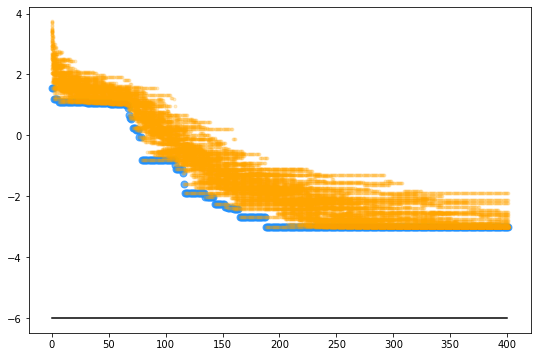

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
xvec = np.log10(opt.output['cgarr'])
ls = dict(linewidth=0.0,linestyle='-',marker='o',ms=7,alpha=0.7,color='dodgerblue')
ax.plot(xvec,**ls)
xvec = [0,opt.maxiter]
yvec = np.log10([opt.precision, opt.precision])
ax.plot(xvec, yvec, 'k')
for i in range(nparticles):
    xvec = np.log10(opt.output['cparr'][i,:])
    ls = dict(linewidth=0.0,linestyle='-',marker='o',ms=3,alpha=0.2,color='orange')
    ax.plot(xvec, **ls)


# plt.axis([0,opt.maxiter, 0, 100*opt.precision])
plt.show()

In [245]:
opt.output['garr'][:,-1]

array([0.92827059, 0.01      , 0.01      , 1.15897571])

In [246]:
aux_uvin(*opt.output['garr'][:,-1])

(-2.076107965542917e-05, 500.0003323648698, 0.001)

In [20]:
opt.output['parr'][:,:,-1]

array([[0.99608857, 0.15021863, 0.05635144, 1.15512497],
       [0.99608607, 0.15056084, 0.05635126, 1.15512499],
       [0.99619441, 0.16512662, 0.05644464, 1.15511641],
       [0.99608579, 0.15034816, 0.05635071, 1.15512526],
       [0.99609186, 0.15022407, 0.05635327, 1.15512482],
       [0.99599838, 0.18835555, 0.05643284, 1.1551253 ],
       [0.99609044, 0.1497994 , 0.05635112, 1.15512495],
       [0.99609275, 0.15031773, 0.05635379, 1.15512485],
       [0.99609104, 0.150264  , 0.05635281, 1.15512485],
       [0.99608988, 0.1504046 , 0.05635273, 1.15512495],
       [0.99609272, 0.15018639, 0.05635342, 1.15512487],
       [0.99620398, 0.15657932, 0.05643252, 1.15512122],
       [0.996095  , 0.1481464 , 0.05634817, 1.15512504],
       [0.996087  , 0.15031141, 0.0563511 , 1.15512513],
       [0.99606129, 0.15048771, 0.0563398 , 1.15512649],
       [0.99609302, 0.15022568, 0.05635364, 1.1551248 ],
       [0.99608686, 0.15032426, 0.05635108, 1.15512513],
       [0.99609039, 0.15027799,

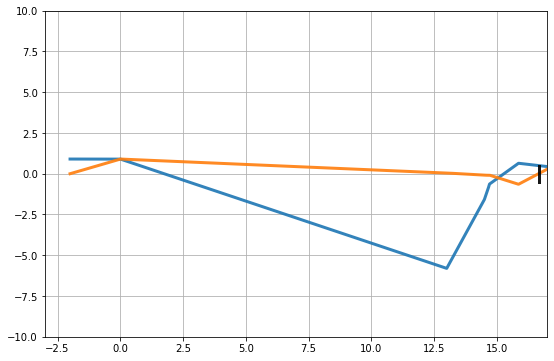

In [23]:

# make beamline
BLUVcathode = aux_make_uvin_bl( *opt.output['garr'][:,-1] )
CATHPOS = BLUVcathode.element_list[ BLUVcathode.element_names.index('lens_uvin_04') ].properties['position'] + DIST_L2CATH

# principal rays
inpos01 = -2
R0 = 0.9e-3
A0 = np.abs(R0/inpos01)
invec01 = np.array([[R0, 0],[0,A0]])

# outpos01 = np.arange(0.0,3,0.001)
outpos01 = np.arange(0.0,17,0.005)
outpos01, outvec01,_,_ = BLUVcathode.ray_trace(invec01, inpos01, outpos01)

fig, ax = plt.subplots(figsize=(9,6))

ls = dict(linewidth=3,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.91)
colorlist = ['dodgerblue','dodgerblue','orange','orange']
xvec = outpos01

yscale = 1e3
for i in range(invec01.shape[1]):
    # ls['color'] = colorlist[i]
    yvec = yscale * outvec01[:,0,i]
    ax.plot(xvec, yvec,**ls)

xvec = [CATHPOS, CATHPOS]
yvec = [-0.5,0.5]
ls['color'] = 'k'
ax.plot(xvec,yvec,**ls)

pr = [-3.0,17, -10.0,10.0]
# pr = [-2,16, -20.0,20.0]
# pr = [14.5,16, -2.0,2.0]
# pr = [CATHPOS-2.8,CATHPOS+0.1, -2.0,2.0]
plt.axis(pr)
# plt.xticks(np.arange(0.0, 18, 1.5))
# plt.yticks(np.arange(-2.5,2.5,0.25))
plt.grid(True)
plt.show()


In [ ]:
figpath = r'D:/Dropbox/RBT/4grit/laser/reports/figures/uv-transport/'
figname = r'line_mainrays_UV-photocathode_20210812.png'
fig.savefig(figpath+figname, dpi=100, format='png')

In [15]:
# make beam
UV_POS_MEAN = 0.0e-6
UV_POS_RMS = 450.0e-6
UV_ANG_MEAN = 10.0e-6
UV_ANG_RMS = 10e-6
NMACRO = 1000

rng = np.random.default_rng(77)

invec_uvcathode = np.stack((rng.normal(UV_POS_MEAN, UV_POS_RMS, NMACRO),
                    rng.normal(UV_ANG_MEAN, UV_ANG_RMS, NMACRO)))
INPOS = -2
# OUTPOS = np.array([3.0])

outpos_uvcathode = np.arange(-2.0,CATHPOS+0.1,0.1)
outpos_uvcathode, outvec_uvcathode, outvec_uvcathode_MEAN, outvec_uvcathode_RMS = BLUVcathode.ray_trace(invec_uvcathode, INPOS, outpos_uvcathode)

outvecstd = np.array( [ outvec_uvcathode[i,0,:].std() for i in range(outvec_uvcathode.shape[0]) ] )
outvecmax = np.array( [ outvec_uvcathode[i,0,:].max() for i in range(outvec_uvcathode.shape[0]) ] )

In [233]:
invec_uvcathode[0,:].mean()

-2.162041638120712e-06

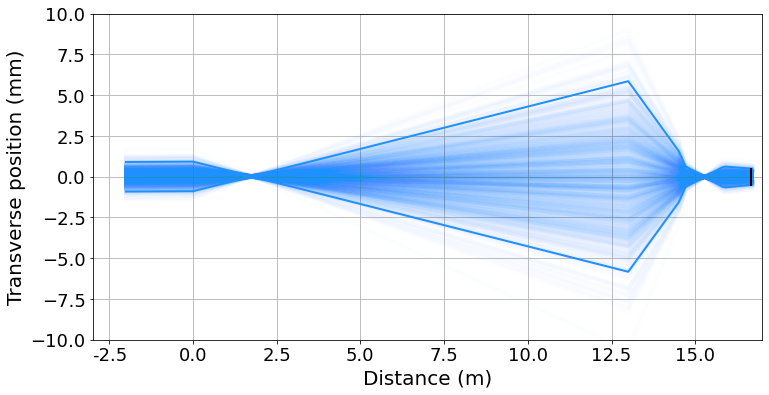

In [29]:
fig, ax = plt.subplots(figsize=(12,6))

ls = dict(linewidth=4,linestyle='-',marker='o',ms=0, mfc='None', alpha=0.01)
ls['color'] = 'dodgerblue'
xscale = 1
xvec = xscale*outpos_uvcathode

yscale = 1e3
for i in range(invec_uvcathode.shape[1]):
    yvec = yscale * outvec_uvcathode[:,0,i]
        
    ax.plot(xvec, yvec,**ls)

ls = dict(linewidth=2,linestyle='-',color='dodgerblue',marker='o',ms=0, mfc='None', alpha=1)
ax.plot(xvec, yscale*(outvec_uvcathode_MEAN[:,0] + 2*outvec_uvcathode_RMS[:,0]), **ls)
ax.plot(xvec, yscale*(outvec_uvcathode_MEAN[:,0] - 2*outvec_uvcathode_RMS[:,0]), **ls)

ls = dict(linewidth=2,linestyle='-',color='orange',marker='o',ms=0, mfc='None', alpha=1)
yvec = 1e6 * outvec_uvcathode_MEAN[:,0]
# ax.plot(xvec, yvec, **ls)

xvec = xscale*np.array([CATHPOS, CATHPOS])
yvec = np.array([-0.5,0.5])
ls['color'] = 'k'
ax.plot(xvec,yvec,**ls)

pr = [-3.0,17, -10.0,10.0]
# pr = [-2,17, -10.0,10.0]
# pr = [14.5,16, -2.0,2.0]
# pr = [CATHPOS-0.2,CATHPOS+0.1, -5.0,5.0]
plt.axis(pr)
# plt.xticks(np.arange(0.0, 16, 1))
# plt.yticks(np.arange(-2.5,2.5,0.25))
fs = dict(color='k', fontsize=20)

ax.set_xlabel('Distance (m)', **fs)
ax.set_ylabel('Transverse position (mm)',**fs)


leglist = ['hour-glass', 'constant profile']
# ax.legend(leglist, fontsize=20,loc='upper right')
ax.tick_params(labelcolor='k', labelsize=18 )
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax.grid(True)
plt.show()

In [30]:

figpath = r'D:/Dropbox/RBT/4grit/laser/reports/figures/uv-transport/'
figname = r'line_beam_UV-photocathode_20210812.png'
fig.savefig(figpath+figname, dpi=100, format='png')

In [201]:
indcathode = np.isclose(outpos_uvcathode,CATHPOS*np.ones_like(outpos_uvcathode), atol=1e-2)
print(CATHPOS)
print(outpos_uvcathode[indcathode])
print(1e6*outvec_uvcathode_MEAN[indcathode, 0])

16.523099795826155
[16.52 16.53]
[-6.99063795 -7.7398802 ]


In [21]:
print(BLUVcathode.element_names)
for el in BLUVcathode.element_list:
    print(el.properties)

['lens_exp1_01', 'lens_exp1_02', 'lens_exp2_01', 'lens_exp2_02', 'lens_exp2_03', 'lens_uvin_01', 'lens_uvin_02', 'lens_uvin_03', 'lens_uvin_04']
{'eletype': 'lens', 'position': 0.0, 'focal_len': 1.74524}
{'eletype': 'lens', 'position': 1e-06, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 13.000001, 'focal_len': 1.74524}
{'eletype': 'lens', 'position': 13.000001999999999, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 13.000002999999998, 'focal_len': 1000000.0}
{'eletype': 'lens', 'position': 14.496095678385853, 'focal_len': 1.0}
{'eletype': 'lens', 'position': 14.646323519530593, 'focal_len': 1.0}
{'eletype': 'lens', 'position': 14.702676977962664, 'focal_len': -0.15}
{'eletype': 'lens', 'position': 15.85780177074644, 'focal_len': 0.5}
